In [31]:
!pip3 install -q xlrd xlwt
!pip3 install -q openpyxl
!pip3 install -q seaborn


In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

2.4.1


In [34]:
rawDataset = pd.read_excel('vehicle_emission_1.xls', index_col=0)
rawDataset

SN    Make    Yr FuelType  VehicleUse    CO   CO2     O2   HC  lamda  \
N                                                                              
1        1   Honda  2006   Petrol  Commercial  0.00  13.5   1.55    0   1.08   
2        2   Honda  2007   Petrol  Commercial  0.00  14.7   0.08   10   1.00   
3        3  Toyota  2011   Petrol  Commercial  0.00  14.6   0.72    1   1.04   
4        4  Toyota  1998   Petrol    Official  0.00  10.2   3.15    1   1.22   
5        5  Toyota  2002   Petrol    Official  0.00  14.5   0.60    1   1.03   
...    ...     ...   ...      ...         ...   ...   ...    ...  ...    ...   
2761  2796  Toyota  1987   Petrol     Private  4.49   5.8  11.29  603   1.51   
2762  2797  Toyota  2007   Petrol  Commercial  4.51  11.9   0.47  388   0.88   
2763  2798  Nissan  1984   Petrol     Private  4.51  10.9   1.55  203   0.93   
2764  2799  Nissan  1986   Petrol     Private  4.55   9.9   3.44  679   1.00   
2765  2800  Nissan  1989   Petrol    Official  4.65   8.3   5.61  138   1.13   

       Study   OGEPA  Age VehicleType  EUROII NESREAI     AFR NESREAII EUROIII  
N                                                                               
1     Passed  Passed    8         Car  Passed  Passed  15.876   Passed  Passed  
2     Passed  Passed    7        Jeep  Passed  Passed  14.744   Passed  Passed  
3     Passed  Passed    3         Car  Passed  Passed  15.244   Passed  Passed  
4     Passed  Passed   16         Car  Passed  Passed  17.934   Passed  Passed  
5     Passed  Passed   12         Car  Passed  Passed  15.141   Passed  Passed  
...      ...     ...  ...         ...     ...     ...     ...      ...     ...  
2761  Failed  Failed   27         Car  Failed  Failed  22.256   Passed  Failed  
2762  Failed  Failed    7         Car  Failed  Failed  12.995   Failed  Failed  
2763  Failed  Failed   30         Car  Failed  Failed  13.700   Failed  Failed  
2764  Failed  Failed   28         Car  Failed  Failed  14.627   Failed  Failed  
2765  Failed  Failed   25         Car  Failed  Failed  16.611   Failed  Failed  

[2765 rows x 19 columns]

In [35]:
rawDataset.columns

Index(['SN', 'Make', 'Yr', 'FuelType', 'VehicleUse', 'CO', 'CO2', 'O2', 'HC',
       'lamda', 'Study', 'OGEPA', 'Age', 'VehicleType', 'EUROII', 'NESREAI',
       'AFR', 'NESREAII', 'EUROIII'],
      dtype='object')

In [36]:
# prefix = ['Make', 'FuelType', 'VehicleUse', 'Study', 'OGEPA', 'VehicleType', 'EUROII', 'NESREAI', 'NESREAII', 'EUROIII']
prefix = ['Study', 'OGEPA', 'EUROII', 'NESREAI', 'NESREAII', 'EUROIII']

dataset = rawDataset.copy()

for col in prefix:
    dict_colData = { x:i for i,x in enumerate(rawDataset[col].unique())}
    print(dict_colData)
    dataset[col + '_N'] = dataset[col].map(dict_colData)
    
# dataset = pd.get_dummies(dataset, prefix=prefix, prefix_sep='_')
dataset

{'Passed': 0, 'Failed': 1}
{'Passed': 0, 'Failed': 1}
{'Passed': 0, 'Failed': 1}
{'Passed': 0, 'Failed': 1}
{'Passed': 0, 'Failed': 1}
{'Passed': 0, 'Failed': 1}


SN    Make    Yr FuelType  VehicleUse    CO   CO2     O2   HC  lamda  \
N                                                                              
1        1   Honda  2006   Petrol  Commercial  0.00  13.5   1.55    0   1.08   
2        2   Honda  2007   Petrol  Commercial  0.00  14.7   0.08   10   1.00   
3        3  Toyota  2011   Petrol  Commercial  0.00  14.6   0.72    1   1.04   
4        4  Toyota  1998   Petrol    Official  0.00  10.2   3.15    1   1.22   
5        5  Toyota  2002   Petrol    Official  0.00  14.5   0.60    1   1.03   
...    ...     ...   ...      ...         ...   ...   ...    ...  ...    ...   
2761  2796  Toyota  1987   Petrol     Private  4.49   5.8  11.29  603   1.51   
2762  2797  Toyota  2007   Petrol  Commercial  4.51  11.9   0.47  388   0.88   
2763  2798  Nissan  1984   Petrol     Private  4.51  10.9   1.55  203   0.93   
2764  2799  Nissan  1986   Petrol     Private  4.55   9.9   3.44  679   1.00   
2765  2800  Nissan  1989   Petrol    Official  4.65   8.3   5.61  138   1.13   

      ... NESREAI     AFR  NESREAII EUROIII Study_N OGEPA_N  EUROII_N  \
N     ...                                                               
1     ...  Passed  15.876    Passed  Passed       0       0         0   
2     ...  Passed  14.744    Passed  Passed       0       0         0   
3     ...  Passed  15.244    Passed  Passed       0       0         0   
4     ...  Passed  17.934    Passed  Passed       0       0         0   
5     ...  Passed  15.141    Passed  Passed       0       0         0   
...   ...     ...     ...       ...     ...     ...     ...       ...   
2761  ...  Failed  22.256    Passed  Failed       1       1         1   
2762  ...  Failed  12.995    Failed  Failed       1       1         1   
2763  ...  Failed  13.700    Failed  Failed       1       1         1   
2764  ...  Failed  14.627    Failed  Failed       1       1         1   
2765  ...  Failed  16.611    Failed  Failed       1       1         1   

     NESREAI_N NESREAII_N  EUROIII_N  
N                                     
1            0          0          0  
2            0          0          0  
3            0          0          0  
4            0          0          0  
5            0          0          0  
...        ...        ...        ...  
2761         1          0          1  
2762         1          1          1  
2763         1          1          1  
2764         1          1          1  
2765         1          1          1  

[2765 rows x 25 columns]

In [37]:
dataset = dataset.drop(['Study', 'OGEPA', 'EUROII', 'NESREAI', 'NESREAII', 'EUROIII'], axis=1)

In [38]:
prefix = ['Make', 'FuelType', 'VehicleUse', 'VehicleType']
dataset = pd.get_dummies(dataset, prefix=prefix, prefix_sep='_')
dataset

SN    Yr    CO   CO2     O2   HC  lamda  Age     AFR  Study_N  ...  \
N                                                                      ...   
1        1  2006  0.00  13.5   1.55    0   1.08    8  15.876        0  ...   
2        2  2007  0.00  14.7   0.08   10   1.00    7  14.744        0  ...   
3        3  2011  0.00  14.6   0.72    1   1.04    3  15.244        0  ...   
4        4  1998  0.00  10.2   3.15    1   1.22   16  17.934        0  ...   
5        5  2002  0.00  14.5   0.60    1   1.03   12  15.141        0  ...   
...    ...   ...   ...   ...    ...  ...    ...  ...     ...      ...  ...   
2761  2796  1987  4.49   5.8  11.29  603   1.51   27  22.256        1  ...   
2762  2797  2007  4.51  11.9   0.47  388   0.88    7  12.995        1  ...   
2763  2798  1984  4.51  10.9   1.55  203   0.93   30  13.700        1  ...   
2764  2799  1986  4.55   9.9   3.44  679   1.00   28  14.627        1  ...   
2765  2800  1989  4.65   8.3   5.61  138   1.13   25  16.611        1  ...   

      VehicleUse_Commercial  VehicleUse_Official  VehicleUse_Private  \
N                                                                      
1                         1                    0                   0   
2                         1                    0                   0   
3                         1                    0                   0   
4                         0                    1                   0   
5                         0                    1                   0   
...                     ...                  ...                 ...   
2761                      0                    0                   1   
2762                      1                    0                   0   
2763                      0                    0                   1   
2764                      0                    0                   1   
2765                      0                    1                   0   

      VehicleType_Bullion V  VehicleType_Bus  VehicleType_CABSTAR  \
N                                                                   
1                         0                0                    0   
2                         0                0                    0   
3                         0                0                    0   
4                         0                0                    0   
5                         0                0                    0   
...                     ...              ...                  ...   
2761                      0                0                    0   
2762                      0                0                    0   
2763                      0                0                    0   
2764                      0                0                    0   
2765                      0                0                    0   

      VehicleType_Car  VehicleType_Jeep  VehicleType_PICK-UP  \
N                                                              
1                   1                 0                    0   
2                   0                 1                    0   
3                   1                 0                    0   
4                   1                 0                    0   
5                   1                 0                    0   
...               ...               ...                  ...   
2761                1                 0                    0   
2762                1                 0                    0   
2763                1                 0                    0   
2764                1                 0                    0   
2765                1                 0                    0   

      VehicleType_TRUCK  
N                        
1                     0  
2                     0  
3                     0  
4                     0  
5                     0  
...                 ...  
2761                  0  
2762                  0  
2763                  0  
2764                  0  
2765         

In [39]:
dataset.columns

Index(['SN', 'Yr', 'CO', 'CO2', 'O2', 'HC', 'lamda', 'Age', 'AFR', 'Study_N',
       'OGEPA_N', 'EUROII_N', 'NESREAI_N', 'NESREAII_N', 'EUROIII_N',
       'Make_Honda', 'Make_Mazda', 'Make_Mercedez B', 'Make_Mitsubushi',
       'Make_Nissan', 'Make_Peugeot', 'Make_Toyota', 'Make_Volkswagen',
       'FuelType_Petrol', 'VehicleUse_Commercial', 'VehicleUse_Official',
       'VehicleUse_Private', 'VehicleType_Bullion V', 'VehicleType_Bus',
       'VehicleType_CABSTAR', 'VehicleType_Car', 'VehicleType_Jeep',
       'VehicleType_PICK-UP', 'VehicleType_TRUCK'],
      dtype='object')

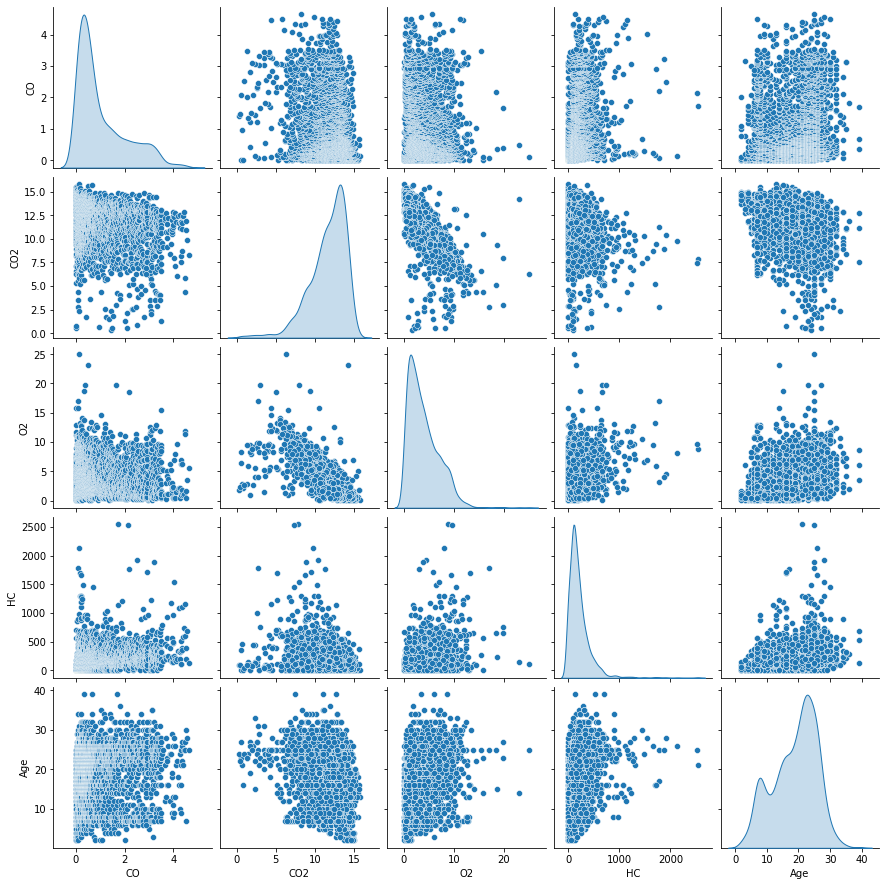

In [40]:
sns.pairplot(dataset[['CO', 'CO2', 'O2', 'HC', 'Age']], diag_kind='kde')

In [41]:
dataset.describe().transpose()

count         mean         std      min       25%  \
SN                     2765.0  1415.341772  802.628639     1.00   727.000   
Yr                     2765.0  1995.155515    6.864281  1975.00  1990.000   
CO                     2765.0     1.037103    1.016213     0.00     0.280   
CO2                    2765.0    11.626101    2.363693     0.30    10.400   
O2                     2765.0     3.963439    3.016935     0.02     1.550   
HC                     2765.0   210.364919  217.622209     0.00    94.000   
lamda                  2764.0     1.680340   20.366994     0.01     1.040   
Age                    2765.0    18.844485    6.864281     2.00    14.000   
AFR                    2765.0    24.684637  299.341172     0.00    15.288   
Study_N                2765.0     0.277396    0.447795     0.00     0.000   
OGEPA_N                2765.0     0.105606    0.307388     0.00     0.000   
EUROII_N               2765.0     0.295841    0.456502     0.00     0.000   
NESREAI_N              2765.0     0.058951    0.235576     0.00     0.000   
NESREAII_N             2765.0     0.020615    0.142117     0.00     0.000   
EUROIII_N              2765.0     0.796383    0.402760     0.00     1.000   
Make_Honda             2765.0     0.137794    0.344746     0.00     0.000   
Make_Mazda             2765.0     0.077396    0.267267     0.00     0.000   
Make_Mercedez B        2765.0     0.031826    0.175569     0.00     0.000   
Make_Mitsubushi        2765.0     0.074141    0.262048     0.00     0.000   
Make_Nissan            2765.0     0.290778    0.454203     0.00     0.000   
Make_Peugeot           2765.0     0.016998    0.129288     0.00     0.000   
Make_Toyota            2765.0     0.355877    0.478865     0.00     0.000   
Make_Volkswagen        2765.0     0.015190    0.122330     0.00     0.000   
FuelType_Petrol        2765.0     1.000000    0.000000     1.00     1.000   
VehicleUse_Commercial  2765.0     0.130922    0.337376     0.00     0.000   
VehicleUse_Official    2765.0     0.133816    0.340516     0.00     0.000   
VehicleUse_Private     2765.0     0.735262    0.441273     0.00     0.000   
VehicleType_Bullion V  2765.0     0.000723    0.026890     0.00     0.000   
VehicleType_Bus        2765.0     0.063291    0.243530     0.00     0.000   
VehicleType_CABSTAR    2765.0     0.000723    0.026890     0.00     0.000   
VehicleType_Car        2765.0     0.828571    0.376951     0.00     1.000   
VehicleType_Jeep       2765.0     0.060759    0.238932     0.00     0.000   
VehicleType_PICK-UP    2765.0     0.045570    0.208588     0.00     0.000   
VehicleType_TRUCK      2765.0     0.000362    0.019017     0.00     0.000   

                            50%       75%       max  
SN                     1418.000  2109.000   2800.00  
Yr                     1994.000  2000.000   2012.00  
CO                        0.610     1.580      4.65  
CO2                      12.100    13.400     15.80  
O2                        3.210     5.740     25.00  
HC                      158.000   273.000   2547.00  
lamda                     1.140     1.320   1055.00  
Age                      20.000    24.000     39.00  
AFR                      16.729    19.433  15508.50  
Study_N                   0.000     1.000      1.00  
OGEPA_N                   0.000     0.000      1.00  
EUROII_N                  0.000     1.000      1.00  
NESREAI_N                 0.000     0.000      1.00  
NESREAII_N                0.000     0.000      1.00  
EUROIII_N                 1.000     1.000      1.00  
Make_Honda                0.000     0.000      1.00  
Make_Mazda                0.000     0.000      1.00  
Make_Mercedez B           0.000     0.000      1.00  
Make_Mitsubushi           0.000     0.000      1.00  
Make_Nissan               0.000     1.000      1.00  
Make_Peugeot              0.000     0.000      1.00  
Make_Toyota               0.000     1.000      1.00  
Make_Volkswagen           0.000     0.000      1.00  
FuelType_Petrol           1.000 

In [42]:
dataset.columns

Index(['SN', 'Yr', 'CO', 'CO2', 'O2', 'HC', 'lamda', 'Age', 'AFR', 'Study_N',
       'OGEPA_N', 'EUROII_N', 'NESREAI_N', 'NESREAII_N', 'EUROIII_N',
       'Make_Honda', 'Make_Mazda', 'Make_Mercedez B', 'Make_Mitsubushi',
       'Make_Nissan', 'Make_Peugeot', 'Make_Toyota', 'Make_Volkswagen',
       'FuelType_Petrol', 'VehicleUse_Commercial', 'VehicleUse_Official',
       'VehicleUse_Private', 'VehicleType_Bullion V', 'VehicleType_Bus',
       'VehicleType_CABSTAR', 'VehicleType_Car', 'VehicleType_Jeep',
       'VehicleType_PICK-UP', 'VehicleType_TRUCK'],
      dtype='object')

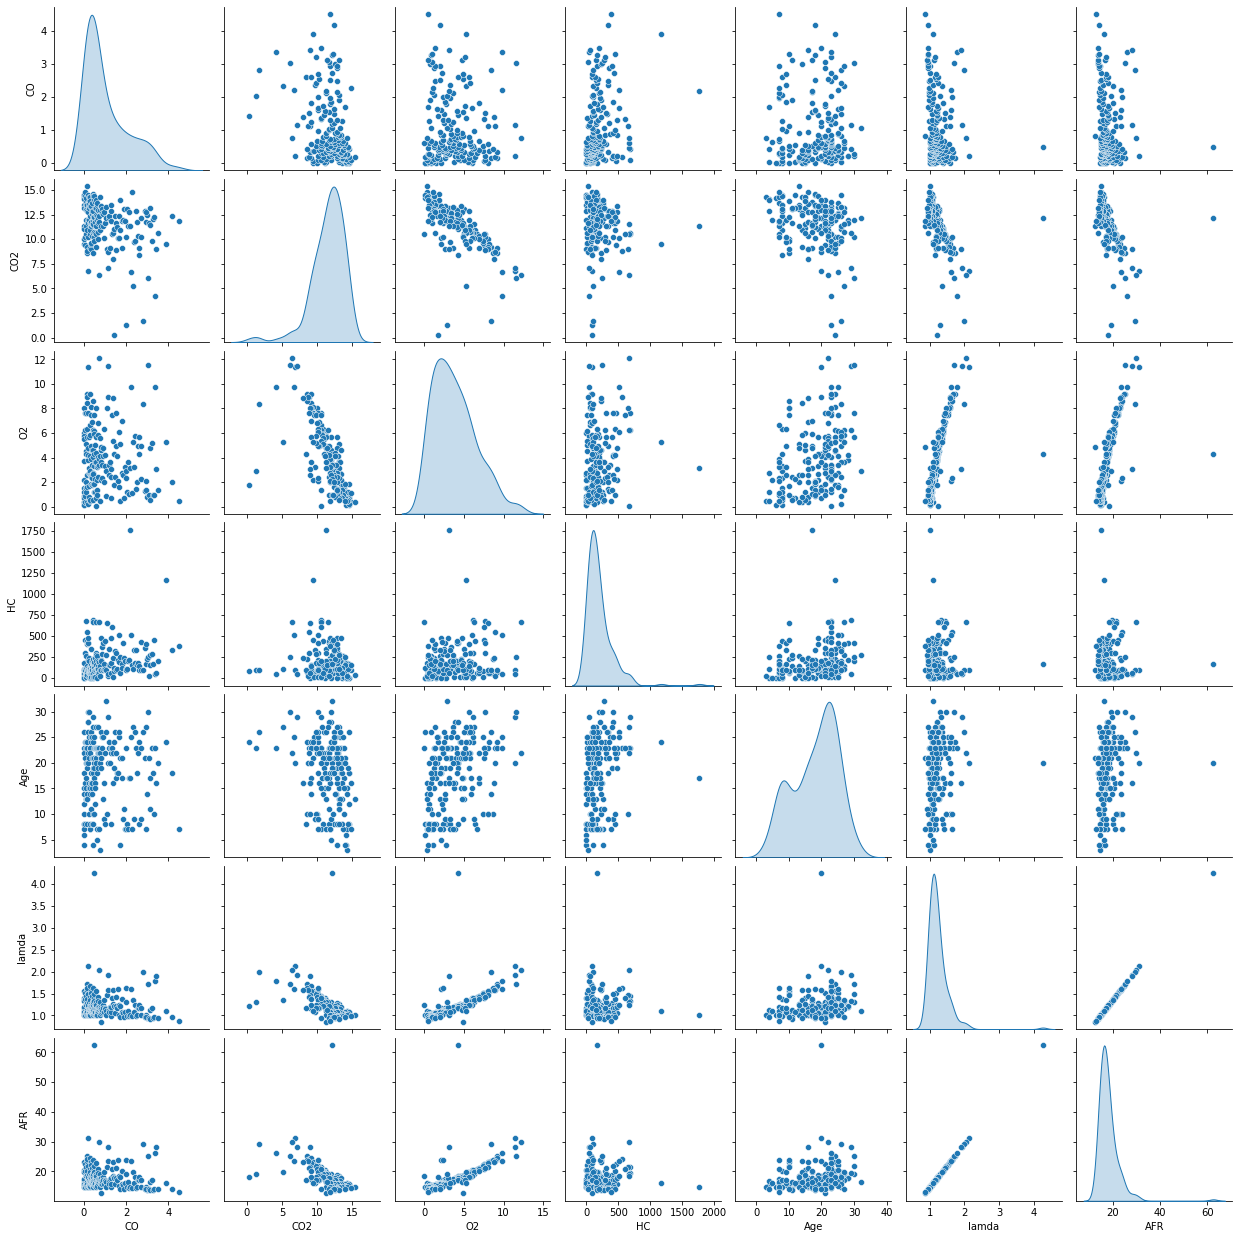

In [97]:
h = 15
X = dataset.copy()
X = X.dropna()
X = X.loc[::h]
sns.pairplot(X[['CO', 'CO2', 'O2', 'HC', 'Age', 'lamda', 'AFR']], diag_kind='kde')

In [99]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the vehicle dataset
X = dataset.copy()
X = X.dropna()
X = X.loc[::h]
# sns.pairplot(X[['CO', 'CO2', 'O2', 'HC', 'Age']], diag_kind='kde')

y = X[['CO','CO2','O2','HC']]
X = X.drop(['CO','CO2','O2','HC','Yr', 
            'lamda',
            'AFR',
            'Study_N', 'OGEPA_N', 'EUROII_N', 'NESREAI_N', 'NESREAII_N', 'EUROIII_N'
            ]
            , axis=1)

scaler = StandardScaler()
scaler.fit(X)
X_normalized = scaler.transform(X)

# Use only one feature
# X = X[:, np.newaxis, 2]

for i in range(1000):
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, random_state=i)

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(X_test)

    # # The coefficients
    # print('Coefficients: \n', regr.coef_)

    # # The mean squared error
    # print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

    # # The coefficient of determination: 1 is perfect prediction
    # print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    if r2 > .6:
        print(i, '- ', r2, mse, len(X_train), len(X_test))


In [100]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)



2.4.1


In [101]:
X = dataset.copy()

train_dataset = X.sample(frac=0.8, random_state=0)
test_dataset = X.drop(train_dataset.index)

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('CO2')
test_labels = test_features.pop('CO2')

In [102]:
train_dataset.describe().transpose()[['mean', 'std']]

mean         std
SN                     1413.139241  809.823443
Yr                     1995.187613    6.863044
CO                        1.041352    1.024783
CO2                      11.606822    2.364534
O2                        3.997654    3.060233
HC                      211.942586  221.158857
lamda                     1.710511   22.412541
Age                      18.812387    6.863044
AFR                      25.125231  329.390428
Study_N                   0.283454    0.450777
OGEPA_N                   0.107143    0.309365
EUROII_N                  0.301989    0.459224
NESREAI_N                 0.059222    0.236094
NESREAII_N                0.020344    0.141205
EUROIII_N                 0.798825    0.400970
Make_Honda                0.141049    0.348151
Make_Mazda                0.077758    0.267850
Make_Mercedez B           0.031646    0.175094
Make_Mitsubushi           0.073237    0.260584
Make_Nissan               0.290235    0.453973
Make_Peugeot              0.017631    0.131636
Make_Toyota               0.353526    0.478172
Make_Volkswagen           0.014919    0.121255
FuelType_Petrol           1.000000    0.000000
VehicleUse_Commercial     0.126582    0.332580
VehicleUse_Official       0.136528    0.343426
VehicleUse_Private        0.736890    0.440421
VehicleType_Bullion V     0.000904    0.030062
VehicleType_Bus           0.063743    0.244350
VehicleType_CABSTAR       0.000904    0.030062
VehicleType_Car           0.824141    0.380786
VehicleType_Jeep          0.062839    0.242728
VehicleType_PICK-UP       0.047016    0.211722
VehicleType_TRUCK         0.000452    0.021262

In [103]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))



In [106]:
train_features

SN    Yr    CO     O2   HC  lamda  Age     AFR  Study_N  OGEPA_N  ...  \
N                                                                         ...   
2162  2197  1993  1.79   2.70  164   1.07   21  15.758        0        0  ...   
1039  1074  1996  0.44   9.60   93   1.72   18  25.269        0        0  ...   
1344  1379  2009  0.59   8.23   44   1.47    5  21.536        0        0  ...   
490    525  2006  0.19   5.96  102   1.37    8  20.110        0        0  ...   
1754  1789  1998  0.99   9.14  557   1.60   16  23.491        1        0  ...   
...    ...   ...   ...    ...  ...    ...  ...     ...      ...      ...  ...   
2344  2379  1991  2.28   1.57  382   0.99   23  14.568        1        0  ...   
1182  1217  2000  0.49  23.10  150   2.00   14  29.400        0        0  ...   
338    373  1991  0.12   4.71  105   1.27   23  18.669        0        0  ...   
47      47  2007  0.01   0.14    8   1.01    7  14.832        0        0  ...   
748    783  1998  0.31   2.67   99   1.13   16  16.596        0        0  ...   

      VehicleUse_Commercial  VehicleUse_Official  VehicleUse_Private  \
N                                                                      
2162                      0                    0                   1   
1039                      1                    0                   0   
1344                      0                    0                   1   
490                       1                    0                   0   
1754                      0                    0                   1   
...                     ...                  ...                 ...   
2344                      0                    0                   1   
1182                      0                    0                   1   
338                       0                    0                   1   
47                        0                    1                   0   
748                       0                    0                   1   

      VehicleType_Bullion V  VehicleType_Bus  VehicleType_CABSTAR  \
N                                                                   
2162                      0                0                    0   
1039                      0                0                    0   
1344                      0                0                    0   
490                       0                0                    0   
1754                      0                0                    0   
...                     ...              ...                  ...   
2344                      0                0                    0   
1182                      0                0                    0   
338                       0                0                    0   
47                        0                0                    0   
748                       0                0                    0   

      VehicleType_Car  VehicleType_Jeep  VehicleType_PICK-UP  \
N                                                              
2162                1                 0                    0   
1039                0                 1                    0   
1344                1                 0                    0   
490                 0                 0                    1   
1754                1                 0                    0   
...               ...               ...                  ...   
2344                1                 0                    0   
1182                1                 0                    0   
338                 1                 0                    0   
47                  0                 0                    1   
748                 1                 0                    0   

      VehicleType_TRUCK  
N                        
2162                  0  
1039                  0  
1344                  0  
490                   0  
1754                  0  
...                 ...  
2344                  0  
1182                  0  
338                   0  


In [109]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[2197.   1993.      1.79    2.7   164.      1.07   21.     15.76    0.
     0.      0.      0.      0.      1.      1.      0.      0.      0.
     0.      0.      0.      0.      1.      0.      0.      1.      0.
     0.      0.      1.      0.      0.      0.  ]]

Normalized: [[ 0.97 -0.32  0.73 -0.42 -0.22  0.62  0.32 -0.03 -0.63 -0.35 -0.66 -0.25
  -0.14  0.5   2.47 -0.29 -0.18 -0.28 -0.64 -0.13 -0.74 -0.12  0.   -0.38
  -0.4   0.6  -0.03 -0.26 -0.03  0.46 -0.26 -0.22 -0.02]]


In [111]:
age = np.array(train_features['Age'])

age_normalizer = preprocessing.Normalization(input_shape=[1,])
age_normalizer.adapt(age)